<a href="https://colab.research.google.com/github/MUSA-650/MUSA-650_Spring2023/blob/master/Week12/DL_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autoencoders

#### Data-driven data dimensionality reduction (compression)

An autoencoder is a type of artificial neural network used to learn efficient data codings in an **unsupervised** manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”.

- Map the initial data to a lower dimensional representation (encoder)
- Map back the low dimensional data to initial data size (decoder)

Used for:
- Data denoising
- Dimensionality reduction 

#### Unsupervised: No labels or output values

#### Question: What is the loss function?


Example (from https://blog.keras.io/building-autoencoders-in-keras.html)

In [1]:
#!pip install keras==2.8

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

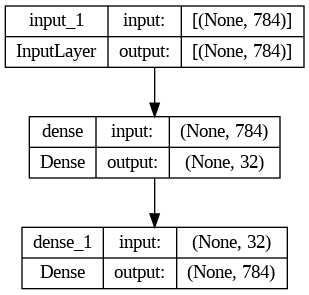

In [2]:
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, show_shapes=True, show_layer_names=True)

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

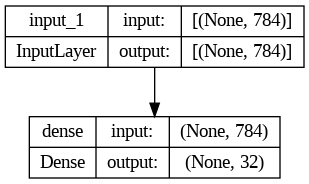

In [4]:
from keras.utils.vis_utils import plot_model
plot_model(encoder, show_shapes=True, show_layer_names=True)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

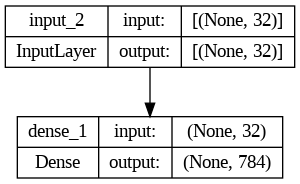

In [6]:
plot_model(decoder, show_shapes=True, show_layer_names=True)

In [14]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [16]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 4s 13ms/step - loss: 0.2732 - val_loss: 0.1876
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1695 - val_loss: 0.1532
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1442 - val_loss: 0.1339
Epoch 4/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1287 - val_loss: 0.1217
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1184 - val_loss: 0.1131
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1112 - val_loss: 0.1072
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1061 - val_loss: 0.1028
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0996 - val_loss: 0.0973
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0976 - val_lo

In [18]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 2ms/step


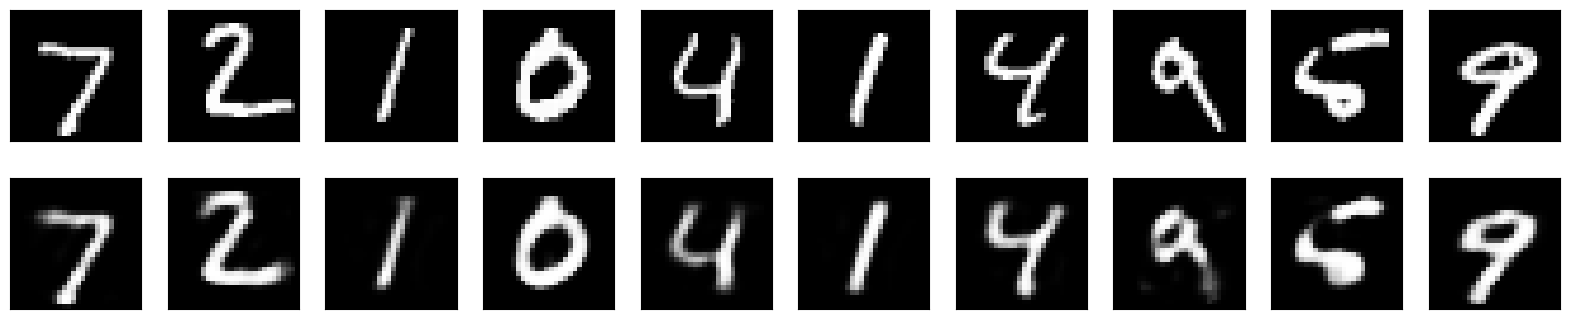

In [19]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional autoencoder

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')